<a href="https://colab.research.google.com/github/abinashgochhayat1998/BasicMachineLearningAlgorithms/blob/main/PCA_CNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
train_tt=pd.read_csv("train.csv")
test_tt=pd.read_csv('test.csv')
train_tt.head()
train_tt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train_tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**DATA-CLEANING**

In [ ]:
train_tt.Cabin=train_tt.Cabin.fillna("unknown")
test_tt.Cabin=test_tt.Cabin.fillna("unknown")

In [ ]:
test_tt["Fare"]=test_tt["Fare"].replace(np.NaN,test_tt["Fare"].median())
train_tt.Embarked=train_tt.Embarked.fillna('S')
test_tt.Embarked=test_tt.Embarked.fillna('S')

In [ ]:
#filled all the Numerical Unknown Value with the median value of the components
train_tt["Age"]=train_tt["Age"].replace(np.NaN,train_tt["Age"].median())
test_tt["Age"]=test_tt["Age"].replace(np.NaN,test_tt["Age"].median())

0    549
1    342
Name: Survived, dtype: int64


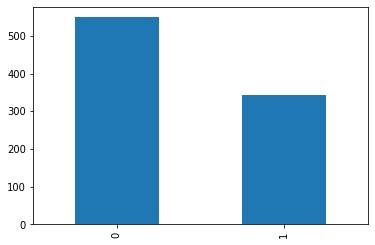

In [ ]:
#Survived or not?
Survived=train_tt.Survived.value_counts()
Survived.plot(kind = 'bar')
print(Survived)

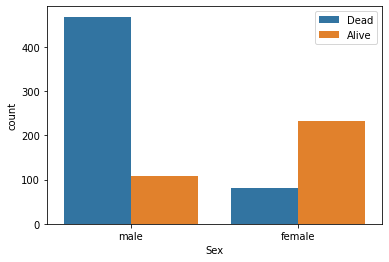

In [ ]:
#Survival of Male and female
ax = sns.countplot(x='Sex',data = train_tt, hue ='Survived',orient = "v") 
ax.legend(['Dead' , 'Alive'])

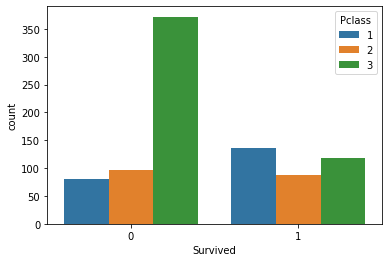

In [ ]:
ax = sns.countplot(x='Survived',data = train_tt, hue ='Pclass',orient = "v") 

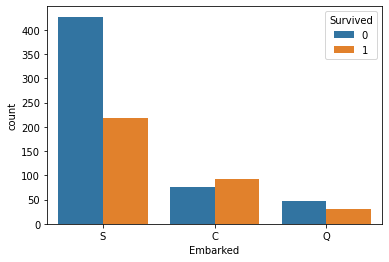

In [ ]:
ax = sns.countplot(hue ='Survived',data = train_tt, x='Embarked',orient = "v")

In [ ]:
#here we r finding variance
vr=np.var(train_tt['Survived'])
print('The variance of Survived is:-')
print(vr)

The variance of Survived is:-
0.2365064789307223


             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096688  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


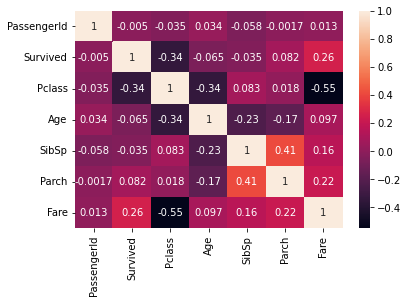

In [ ]:
#Correlation between
ps=train_tt.corr()
print(ps)
sns.heatmap(ps,annot = True)

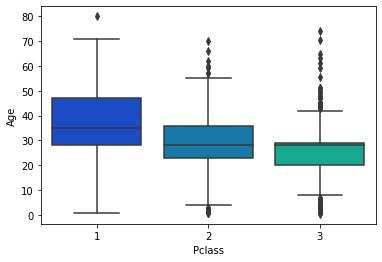

In [ ]:

#plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train_tt,palette='winter')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_tt,train_tt,test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((623, 12), (268, 12))

In [ ]:
#Label Encoding
train_tt.drop('Name',inplace=True,axis=1)
train_tt.Sex[train_tt.Sex=='male']=1
train_tt.Sex[train_tt.Sex=='female']=2
test_tt.drop('Name',inplace=True,axis=1)

train_tt.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,unknown,S
1,2,1,1,2,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,2,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
3,4,1,1,2,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,35.0,0,0,373450,8.0500,unknown,S


In [ ]:
train_tt.loc[train_tt['Sex']=='male','Sex']=0
train_tt.loc[train_tt['Sex']=='female','Sex']=1 
train_tt.loc[train_tt['Embarked']=='S','Embarked']=0
train_tt.loc[train_tt['Embarked']=='C','Embarked']=1
train_tt.loc[train_tt['Embarked']=='Q','Embarked']=2
drop_elements = ['Cabin','Ticket']
train_tt= train_tt.drop(drop_elements, axis=1)
drop_elements = ['Cabin','Ticket']
test_tt= test_tt.drop(drop_elements, axis=1)
train_tt.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,2,38.0,1,0,71.2833,1
2,3,1,3,2,26.0,0,0,7.9250,0
3,4,1,1,2,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [ ]:
test_tt.loc[test_tt['Sex']=='male','Sex']=0
test_tt.loc[test_tt['Sex']=='female','Sex']=1 

test_tt.loc[test_tt['Embarked']=='S','Embarked']=0
test_tt.loc[test_tt['Embarked']=='C','Embarked']=1
test_tt.loc[test_tt['Embarked']=='Q','Embarked']=2
train_tt.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,2,38.0,1,0,71.2833,1
2,3,1,3,2,26.0,0,0,7.9250,0
3,4,1,1,2,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


**Fitting the model Without Feature Extraction**

In [ ]:
x_train_copy=train_tt.copy(deep=True)
X_train = x_train_copy.drop("Survived", axis=1)
Y_train = x_train_copy["Survived"]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
#Bayes Classiffier
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
Y_pred = gaussian.predict(X_train)  
print(classification_report(Y_train,Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       549
           1       0.74      0.72      0.73       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



In [ ]:
from sklearn.metrics import classification_report
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred_1 = logreg.predict(X_train)
acc_log_2 = logreg.score(X_train, Y_train) * 100
acc_log_2
print(classification_report(Y_train,Y_pred_1))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       549
           1       0.75      0.72      0.74       342

    accuracy                           0.80       891
   macro avg       0.79      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import classification_report
# KNN 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_train)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(classification_report(Y_train,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       549
           1       0.79      0.65      0.71       342

    accuracy                           0.80       891
   macro avg       0.80      0.77      0.78       891
weighted avg       0.80      0.80      0.80       891



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(train_tt)
scaled_data = model.transform(train_tt)

Normalization-Standardization(Z-score scaling)
remove means and scaletha data into unit** **variance**

In [ ]:
from scipy import stats
train_tt['Age'] = stats.zscore(train_tt['Age'])#standardized The age component
train_tt['Fare'] = stats.zscore(train_tt['Fare'])#standardized The Fare component
train_tt.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,-0.565736,1,0,-0.502445,0
1,2,1,1,2,0.663861,1,0,0.786845,1
2,3,1,3,2,-0.258337,0,0,-0.488854,0
3,4,1,1,2,0.433312,1,0,0.420730,0
4,5,0,3,1,0.433312,0,0,-0.486337,0


**Feature Selection Using Information Gain**

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(train_tt.drop(labels=['Pclass'],axis=1),train_tt['Pclass'],test_size=0.3,random_state=0)
from sklearn.model_selection import train_test_split

features = train_tt.drop(["PassengerId", "Survived"], axis=1).columns

X = train_tt[features].values
Y = train_tt.Survived.values

x_train, x_val, t_train, t_val = train_test_split(X, Y, random_state=0)

train_df = pd.DataFrame(x_train, columns=features)
train_df["Survived"] = t_train
val_df = pd.DataFrame(x_val, columns=features)
val_df["Survived"] = t_val
X_train,X_test,Y_train,Y_test=train_test_split(train_tt.drop(labels=['Pclass'],axis=1),train_tt['Pclass'],test_size=0.3,random_state=0)
from sklearn.metrics import classification_report

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X_train,Y_train)
mutual_info
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

Fare           0.748683
Age            0.117852
Embarked       0.087362
Survived       0.057810
SibSp          0.031989
Sex            0.026191
PassengerId    0.000000
Parch          0.000000
dtype: float64

In [ ]:
#Selecting the k best component
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, Y_train)
arr = X_train.columns[sel_five_cols.get_support()]
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, Y_train)
arr = X_train.columns[sel_five_cols.get_support()]
arr = X_train.columns[sel_five_cols.get_support()]
print(arr)

Index(['Survived', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')


In [ ]:
#As Survived,Sex,Age,SibSp,Fare are the best 5 Component so extraxt them from Dataset
drop_elements = ['SibSp','PassengerId','Pclass','Parch']
train_tt= train_tt.drop(drop_elements, axis=1)
train_tt.head()

,Survived,Sex,Age,Fare,Embarked
0,0,1,-0.565736,-0.502445,0
1,1,2,0.663861,0.786845,1
2,1,2,-0.258337,-0.488854,0
3,1,2,0.433312,0.420730,0
4,0,1,0.433312,-0.486337,0


####Feature Extraction using PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(train_tt)
X_pca.shape

(891, 4)

In [ ]:
X_train = train_tt.drop('Survived', axis=1)
y_train = train_tt['Survived']

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_train, y_train, test_size=0.3, random_state=30)

In [ ]:
from sklearn.metrics import classification_report
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred_1 = logreg.predict(X_test_pca)
acc_log = logreg.score(X_train, y_train) * 100
acc_log


78.33894500561168

In [ ]:
print(classification_report(y_test_pca,Y_pred_1))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       108
           1       0.71      0.65      0.68        71

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
Y_pred_3 = knn.predict(X_test_pca)
acc_knn_2 = knn.score(X_train, y_train) * 100
acc_knn_2
print(classification_report(y_test_pca,Y_pred_3))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       108
           1       0.74      0.59      0.66        71

    accuracy                           0.75       179
   macro avg       0.75      0.73      0.73       179
weighted avg       0.75      0.75      0.75       179



In [ ]:
#Bayes Classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train) 
classifier.partial_fit(X_train, y_train)
acc_2 = classifier.score(X_train, y_train) * 100

print('Probability of each class')
print('Survive = 0: %.2f' % classifier.class_prior_[0])
print('Survive = 1: %.2f' % classifier.class_prior_[1])
Y_pred2 = classifier.predict(X_test_pca)
print(classification_report(y_test_pca,Y_pred2)) 

Probability of each class
Survive = 0: 0.62
Survive = 1: 0.38
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       108
           1       0.66      0.66      0.66        71

    accuracy                           0.73       179
   macro avg       0.72      0.72      0.72       179
weighted avg       0.73      0.73      0.73       179



In [ ]:
results = pd.DataFrame({
    'Model': [ 'KNN with', 'Logistic Regression with','KNN without', 'Logistic Regression without',  'Naive Bayes without' ,'Naive Bayes with'],
    'Score': [acc_knn_2,acc_log,acc_knn,acc_log_2,acc_gaussian,acc_2]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
81.705948,KNN with
80.022447,Logistic Regression without
80.020000,KNN without
79.350000,Naive Bayes without
78.338945,Logistic Regression with
78.002245,Naive Bayes with
